In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

# Get images from video - trailers 

In [18]:
import numpy as np
import pandas as pd 
import pytube

import cv2
import os
from pytube import YouTube
#Number of photos per one trailer 
import time

img_num = 100
time_list = []
#trailer data frame 
trailer_df = pd.read_csv('ml-youtube.csv')

#Create folder with video 
for i in range(0,10):
    t_st = time.time()

    #Try download 
    try :
        yt = YouTube('https://www.youtube.com/watch?v=' + trailer_df[['youtubeId']].iloc[i].values[0]) 
    except pytube.exceptions.VideoUnavailable:
        print('Video with id = {id_} is unavailable'.format(id_ = i))
        continue 
        

    #Download video into folder 
    video_directory = os.path.dirname('videos/' + str(i) + '/')
    if not os.path.exists(video_directory):
        os.makedirs(video_directory)
        
    stream = yt.streams.first()
    stream.download(video_directory)
    fn = stream.default_filename

    cap = cv2.VideoCapture('videos/' + str(i) + '/' + fn )
    fps = cap.get(cv2.CAP_PROP_FPS)
    fc = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    int_ = int(fc/img_num)
    
    #Create folder with images
    image_directory = os.path.dirname('images/')
    if not os.path.exists(image_directory):
        os.makedirs(image_directory)
    print(fc)
    count = 0 
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True: 

        # Display the resulting frame    
            #cv2.imshow('frame',frame)
        #Save images 
            if( count%int_ == 0 and count > 2*fps and count < fc - 2*fps  ):
                cv2.imwrite(image_directory + "/" + str(i) + "_" + "frame%d.jpg" % int(count/int_), frame)
            count += 1
        # Press Q on keyboard to stop recording
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
      # Break the loop
        else:
            break 

    cap.release()
    cv2.destroyAllWindows()
    t_fin = time.time()
    time_list.append(t_fin - t_st)
    print( 'Time for one trailer : {x}'.format( x = t_fin - t_st ))

2721.0
Time for one trailer : 3.1004035472869873
4008.0
Time for one trailer : 12.0049569606781
3351.0
Time for one trailer : 3.7817816734313965
Video with id = 3 is unavailable
Video with id = 4 is unavailable
3530.0
Time for one trailer : 9.599966526031494
4062.0
Time for one trailer : 4.1640729904174805
1779.0
Time for one trailer : 2.0082902908325195
1213.0
Time for one trailer : 2.9167356491088867
4101.0
Time for one trailer : 12.04841685295105


In [4]:
path_img = Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images')

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/5_frame72.jpg'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/8_frame51.jpg'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/2_frame23.jpg'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/5_frame31.jpg'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/6_frame81.jpg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_frame\d+.jpg$'

In [6]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

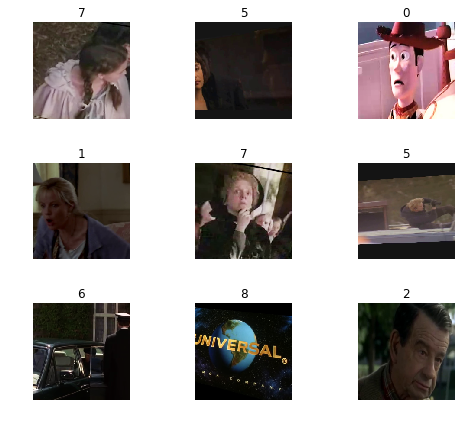

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

Total time: 00:33
epoch  train loss  valid loss  error_rate
1      2.065223    1.220240    0.398649    (00:10)
2      1.440422    0.597909    0.222973    (00:07)
3      1.052061    0.473440    0.141892    (00:07)
4      0.842693    0.455501    0.141892    (00:07)



In [14]:
learn.save('stage-1')

In [15]:
doc(learn.pred_batch)

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

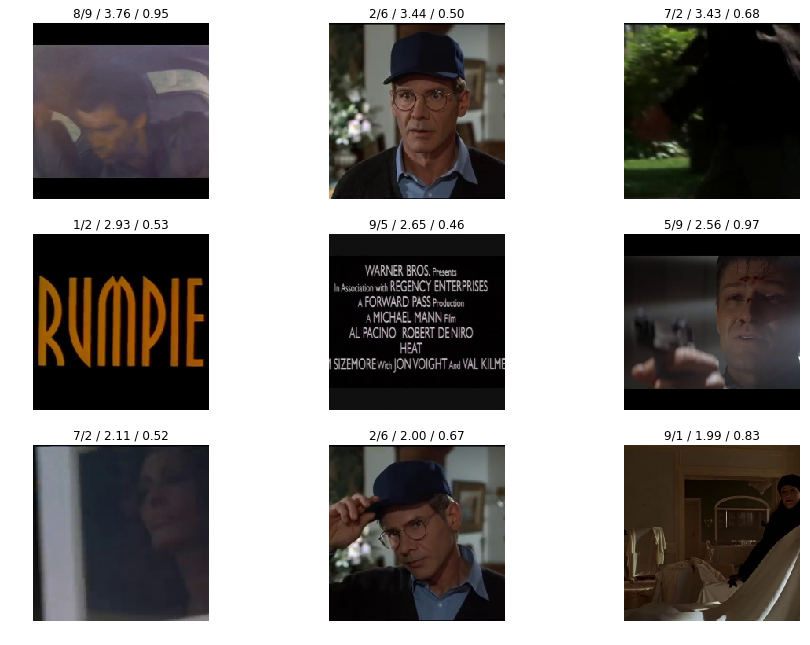

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

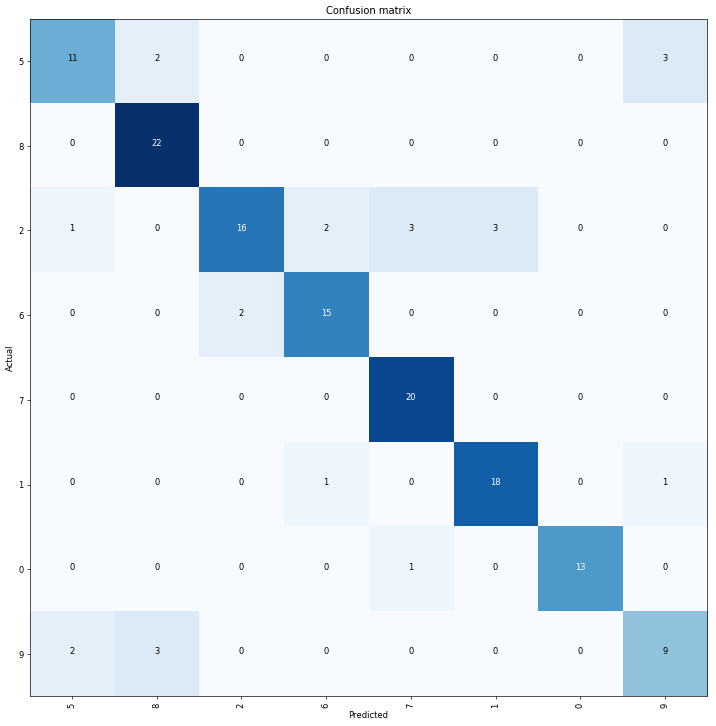

In [30]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [31]:
interp.most_confused(min_val=2)

[('5', '9', 3), ('2', '7', 3), ('2', '1', 3), ('9', '8', 3)]

In [36]:
trailer_df[['title']].iloc[5]

title    Heat (1995)
Name: 5, dtype: object

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(1)

Total time: 00:09
epoch  train loss  valid loss  error_rate
1      0.592433    4.910307    0.729730    (00:09)



In [39]:
learn.load('stage-1')

In [40]:
learn.lr_find()

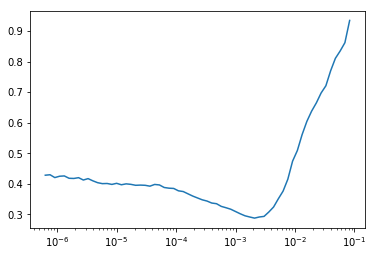

In [41]:
learn.recorder.plot()

In [42]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-2))

Total time: 00:17
epoch  train loss  valid loss  error_rate
1      0.577981    1.183635    0.277027    (00:08)
2      0.485557    0.957347    0.209459    (00:08)



In [43]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs = 48 )
data.normalize(imagenet_stats)

In [44]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 61439158.63it/s]


In [45]:
learn.fit_one_cycle(5)

Total time: 00:55
epoch  train loss  valid loss  error_rate
1      1.634025    0.782581    0.270718    (00:16)
2      1.041110    0.482165    0.171271    (00:09)
3      0.759477    0.361505    0.104972    (00:09)
4      0.550556    0.305311    0.088398    (00:09)
5      0.433641    0.311485    0.088398    (00:09)



In [46]:
learn.save('stage-1-50')

In [47]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-4,1e-2))

Total time: 00:13
epoch  train loss  valid loss  error_rate
1      0.733147    1.429908    0.314917    (00:13)



In [48]:
learn.load('stage-1-50')

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

In [50]:
interp.most_confused(min_val=2)

[('9', '8', 4)]

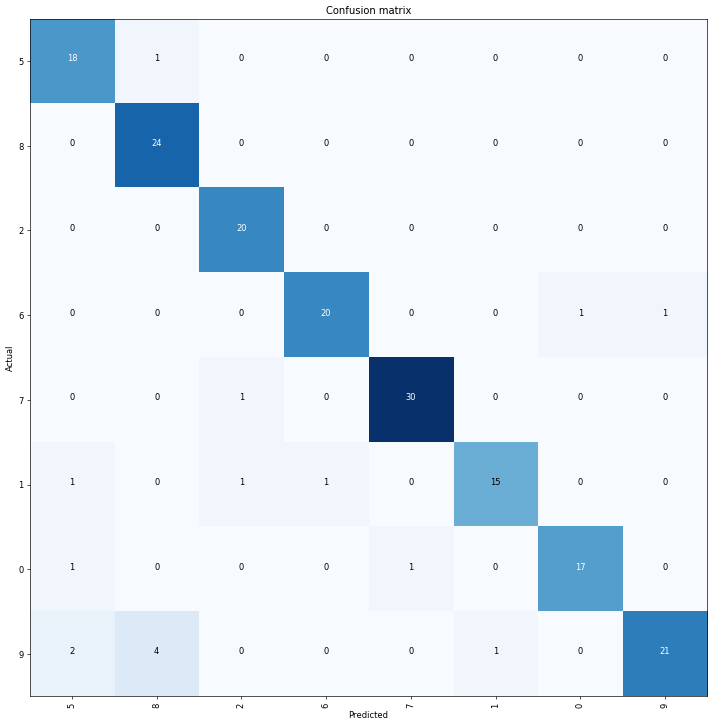

In [51]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [56]:
doc(ConvLearner)

In [55]:
learn.predict()

AttributeError: 'ConvLearner' object has no attribute 'predict'